In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [76]:
NHIS = pd.read_csv("/content/NHIS_2019_to_2022_data.csv")

In [77]:
NHIS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 15 columns):
 #   Column                                                                  Non-Null Count  Dtype 
---  ------                                                                  --------------  ----- 
 0   Unnamed: 0                                                              169 non-null    int64 
 1   Survey Year                                                             169 non-null    int64 
 2   NCHS Urban-Rural Classification                                         169 non-null    object
 3   Household region                                                        169 non-null    object
 4    Hispanic ethnicity of SA                                               169 non-null    object
 5   Sex                                                                     169 non-null    object
 6   Age                                                                     169 non-null    in

**Checking percentage of missing values**

In [78]:
NHIS.isna().sum()/NHIS.shape[0]*100

Unnamed: 0                                                                 0.000000
Survey Year                                                                0.000000
NCHS Urban-Rural Classification                                            0.000000
Household region                                                           0.000000
 Hispanic ethnicity of SA                                                  0.000000
Sex                                                                        0.000000
Age                                                                        0.000000
Health insurance hierarchy under 65 Code Description Frequency Percent    77.514793
Health Insurance hierarchy 65+ Code Description Frequency Percent         22.485207
Lung Cancer                                                                0.000000
OOP_Cost                                                                   0.000000
Deductible - plan 1                                                        0

**Since percentage of missing values are more hence the missing values are filles with "Others" value"**

In [79]:
NHIS=NHIS.mask(NHIS == '')
NHIS['Health Insurance hierarchy 65+ Code Description Frequency Percent'].fillna('Others',inplace=True)

In [80]:
NHIS=NHIS.mask(NHIS == '')
NHIS['Health insurance hierarchy under 65 Code Description Frequency Percent'].fillna('Others',inplace=True)

In [81]:
NHIS.isna().sum()/NHIS.shape[0]*100

Unnamed: 0                                                                0.0
Survey Year                                                               0.0
NCHS Urban-Rural Classification                                           0.0
Household region                                                          0.0
 Hispanic ethnicity of SA                                                 0.0
Sex                                                                       0.0
Age                                                                       0.0
Health insurance hierarchy under 65 Code Description Frequency Percent    0.0
Health Insurance hierarchy 65+ Code Description Frequency Percent         0.0
Lung Cancer                                                               0.0
OOP_Cost                                                                  0.0
Deductible - plan 1                                                       0.0
Plan pays for prescription drug - plan 1                        

In [82]:
NHIS.head(5)

,Unnamed: 0,Survey Year,NCHS Urban-Rural Classification,Household region,Hispanic ethnicity of SA,Sex,Age,Health insurance hierarchy under 65 Code Description Frequency Percent,Health Insurance hierarchy 65+ Code Description Frequency Percent,Lung Cancer,OOP_Cost,Deductible - plan 1,Plan pays for prescription drug - plan 1,"Problems paying medical bills, past 12m",Delayed medical care due to cost
0,0,2019,Medium and small metro,South,No,Female,70,Others,Private,1,1200,No,Yes,No,No
1,1,2019,Large central metro,Midwest,No,Female,59,Private,Others,1,4420,Yes,Yes,Yes,No
2,2,2019,Large fringe metro,West,No,Female,85,Others,Private,1,156,Yes,No,No,No
3,3,2019,Medium and small metro,West,No,Female,82,Others,Private,1,1284,No,No,No,No
4,4,2019,Large fringe metro,South,No,Male,51,Private,Others,1,4160,No,Yes,No,No


In [83]:
# drop column
NHIS_modified = NHIS.drop('Unnamed: 0', axis=1)

In [84]:
# lable encoding to convert categorical values into numerical values
le = LabelEncoder()
for col in NHIS_modified.columns:
  if NHIS_modified[col].dtypes == 'object':
    NHIS_modified[col] = le.fit_transform(NHIS_modified[col])

In [85]:
# Rename column
NHIS_modified.rename(columns={'Health insurance hierarchy under 65 Code Description Frequency Percent': 'HIHU_65','Health Insurance hierarchy 65+ Code Description Frequency Percent': 'HIH_65+','Problems paying medical bills, past 12m': 'MB_12','Plan pays for prescription drug - plan 1': 'PD-Plan 1'},inplace=True)

**Heatmap to check the correlation among variables**

<Axes: >

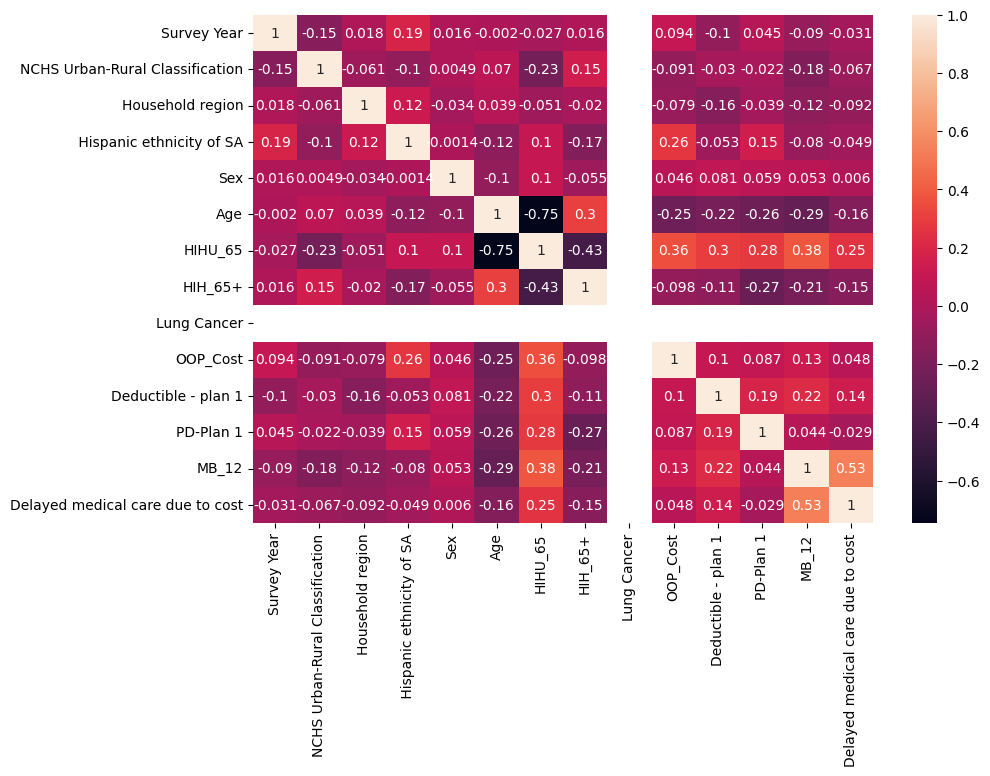

In [86]:
plt.figure(figsize=(10,6.6))
sns.heatmap(NHIS_modified.corr(), annot=True)

**ANALYSIS**

**1) Mean age of patients is 72**

**2) 75% of the patients has 80 years of age**

**3) Average out of pocket expense is 3420.92**

**4) 75% of patients has payed bill of 3900 out of pocket**

In [99]:
NHIS.describe()

,Unnamed: 0,Survey Year,Age,Lung Cancer,OOP_Cost
count,169.000000,169.000000,169.000000,169.0,169.000000
mean,84.000000,2020.473373,72.319527,1.0,3420.923077
std,48.930222,1.063827,10.024596,0.0,3271.595997
min,0.000000,2019.000000,26.000000,1.0,1.000000
25%,42.000000,2020.000000,66.000000,1.0,1476.000000
50%,84.000000,2020.000000,74.000000,1.0,2640.000000
75%,126.000000,2021.000000,80.000000,1.0,3900.000000
max,168.000000,2022.000000,85.000000,1.0,24000.000000


**ANALYSIS**

**1) In 2020, Female from South household region was the most affected by Lung Cancer**

**2)  In 2021, Male from South household region was the most affected by Lung Cancer**

**3) Through out the year South region showed most number of lung cancer in Female and male compared to other regions**

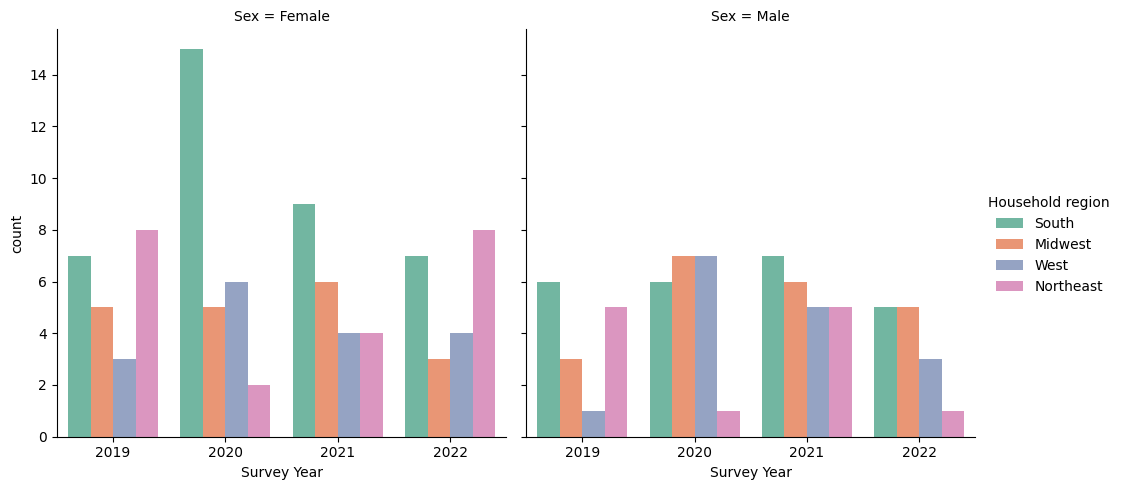

In [104]:
sns.catplot(data=NHIS, x='Survey Year', hue='Household region', col='Sex', kind='count', palette='Set2')

**ANALYSIS**

**1) More Female patients have Deductible - plan 1 than male patients except the year 2021**

**2) In the category of Deductible - plan 1 as 'No', Female patients are more than male**

<Figure size 1000x700 with 0 Axes>

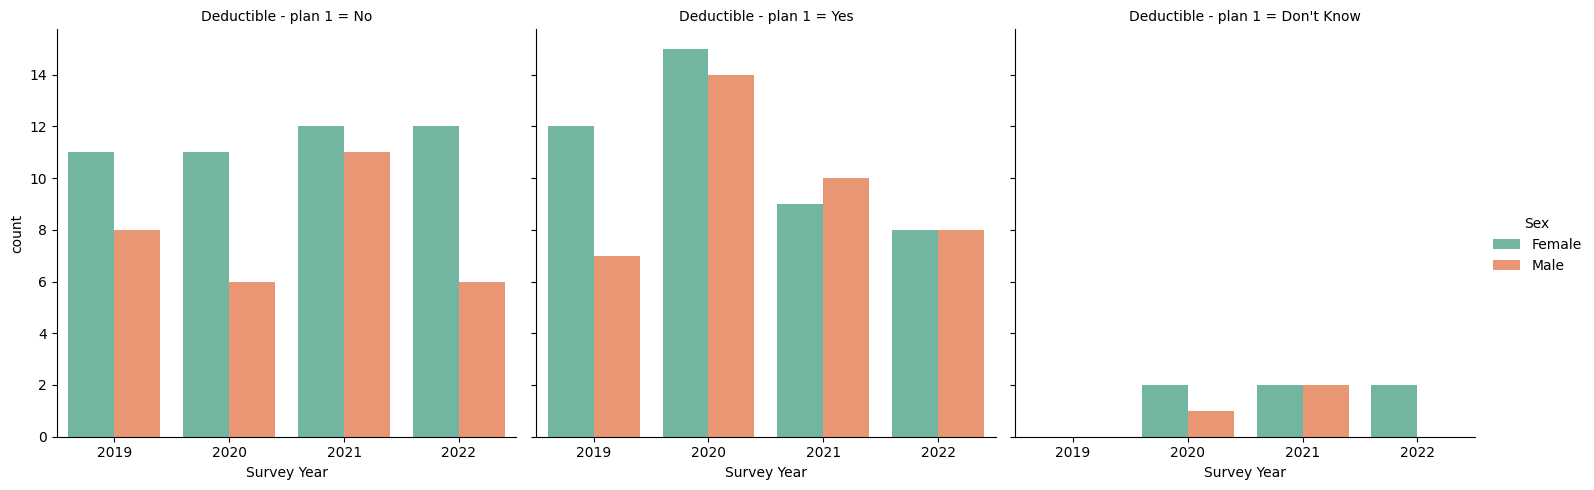

In [149]:
plt.figure(figsize=(10,7))
sns.catplot(data=NHIS, x='Survey Year', hue='Sex', col='Deductible - plan 1', kind='count', palette='Set2')

**ANALYSIS**

**1) Patients who do not have Deductible - plan 1 has less out of pocket expense than those who have the plan**

<Axes: xlabel='Survey Year', ylabel='OOP_Cost'>

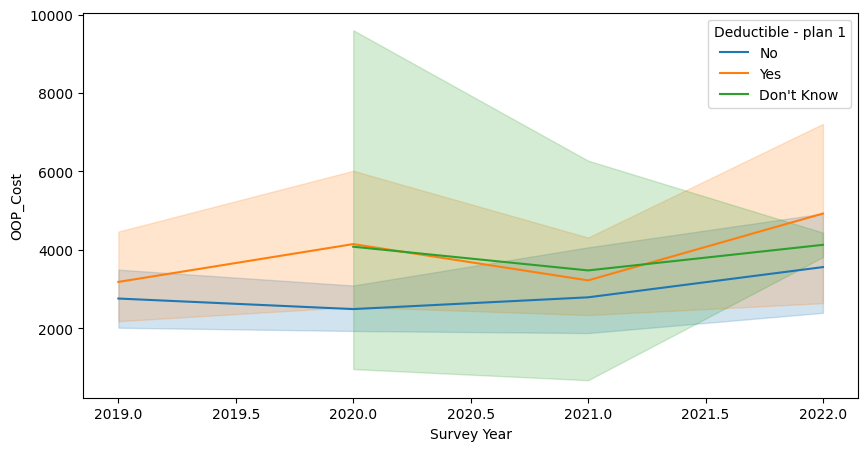

In [154]:
plt.figure(figsize=(10,5))
sns.lineplot(data=NHIS, x='Survey Year', y='OOP_Cost', hue='Deductible - plan 1')

**ANALYSIS**

**1) In 2020, medical care delay was the lowest due to cost**

**2) From 2019 to 2020, delayed medical care was in rise and it has started decreasing slightly post 2020.**

<Axes: xlabel='Survey Year', ylabel='Delayed medical care due to cost'>

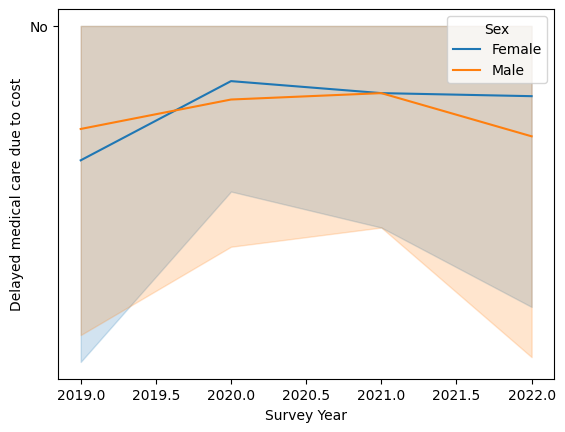

In [151]:
sns.lineplot(data=NHIS, x='Survey Year', y='Delayed medical care due to cost', hue='Sex')

**ANALYSIS**

**1) Problems in paying medicall bill has lot of fluctuation over the years**

**2) It was the highest in 2020 and the lowest in 2021**

**3) Female has faced less problems in paying bills compare to male patients except the year 2021**

<Axes: xlabel='Survey Year', ylabel='Problems paying medical bills, past 12m'>

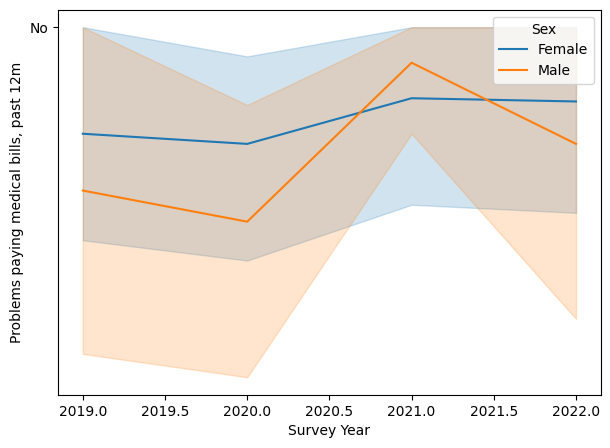

In [129]:
plt.figure(figsize=(7,5))
sns.lineplot(data=NHIS, x='Survey Year', y='Problems paying medical bills, past 12m',hue='Sex')

**ANALYSIS**

**1) Out of pocket cost has lot of fluctuation over the years**

**2) It was the lowest in 2021 and the highest in 2022**

**3) In 2019, male patients' expense was less compare to female which has been gradually increased over the years**

<Axes: xlabel='Survey Year', ylabel='OOP_Cost'>

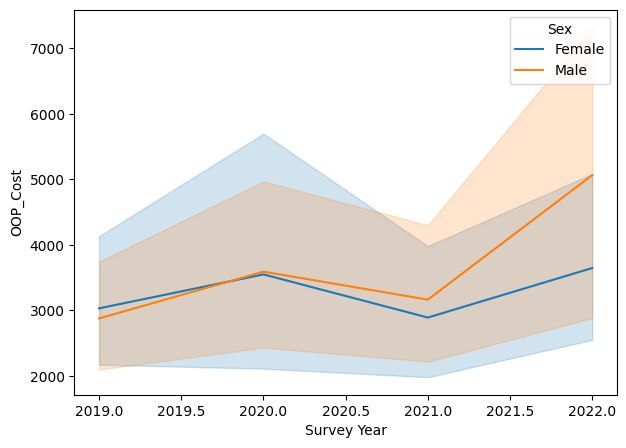

In [133]:
plt.figure(figsize=(7,5))
sns.lineplot(data=NHIS, x='Survey Year', y='OOP_Cost', hue='Sex')

**ANALYSIS**

**1) Large central metro cities hav shown increase in out of pocket expenses over the years with many fluctuations of high and low**

**2) Out of pocket expenses in Large firnge metro cities have been decreased over the years**

**3) In 2019, male patients' expense was less compare to female which has been gradually increased over the years**

<Axes: xlabel='Survey Year', ylabel='OOP_Cost'>

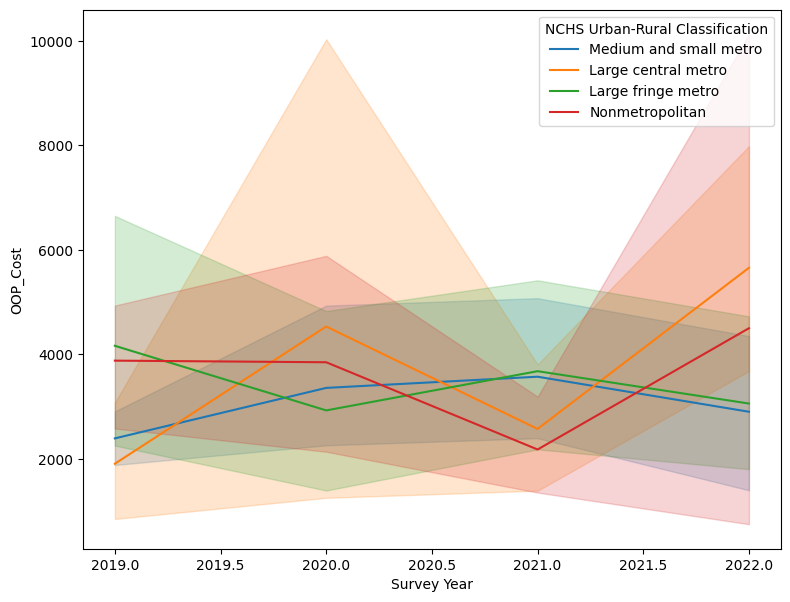

In [139]:
plt.figure(figsize=(9,7))
sns.lineplot(data=NHIS, x='Survey Year', y='OOP_Cost', hue='NCHS Urban-Rural Classification')

**ANALYSIS**

**1) Most of the Out of pocket expense has been spent by patients from 70-80 years of age**

**2) Number of patients at the age of 30 and below is less to spend out ofpocket expense**

<Axes: xlabel='Age', ylabel='OOP_Cost'>

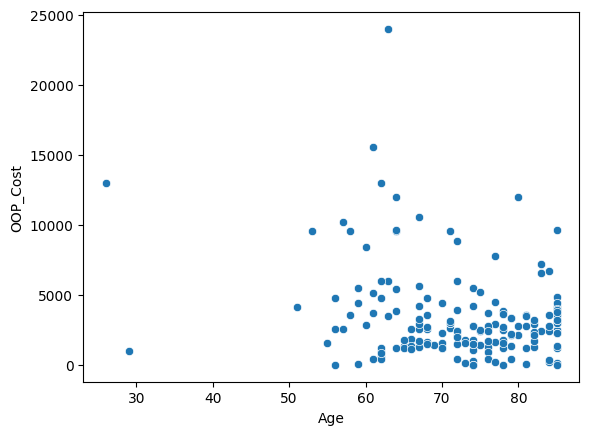

In [142]:
sns.scatterplot(data=NHIS, x='Age', y='OOP_Cost')

**ANALYSIS**

**1) Patients at the age of 80 are the most affected by lung cancer**

**2) There is no patients at the age of 40 who is affected by lung cancer**

**3) The density of most affected patients is from 70 to 85 years of age**

<Axes: xlabel='Age', ylabel='Count'>

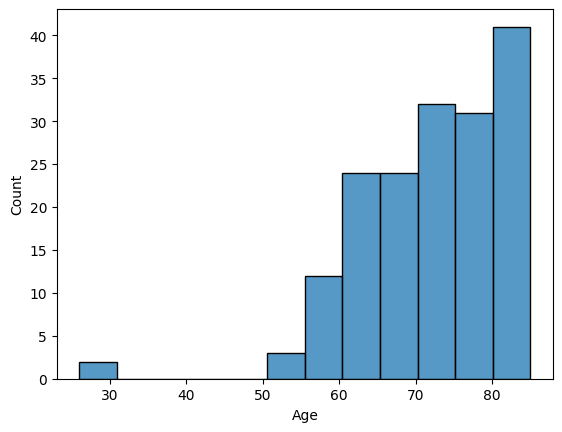

In [143]:
sns.histplot(data=NHIS['Age'])

Others     131
Private     38
Name: Health insurance hierarchy under 65 Code Description Frequency Percent, dtype: int64